In [9]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [10]:
#Load sales of smartphones in India (Rupee)
data = pd.read_csv("Sales.csv")
data.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [11]:
data.dtypes

Brands                  object
Models                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
Mobile                  object
Discount                 int64
discount percentage    float64
dtype: object

In [12]:
data.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [13]:
data.shape

(3114, 12)

<Axes: >

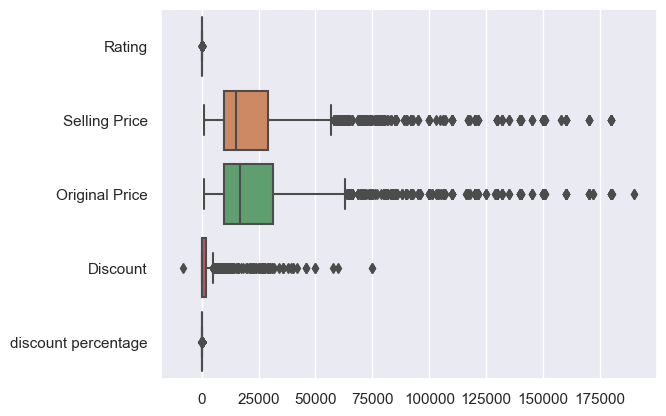

In [14]:
sb.boxplot(data=data, orient="h")

<Axes: xlabel='Original Price', ylabel='Density'>

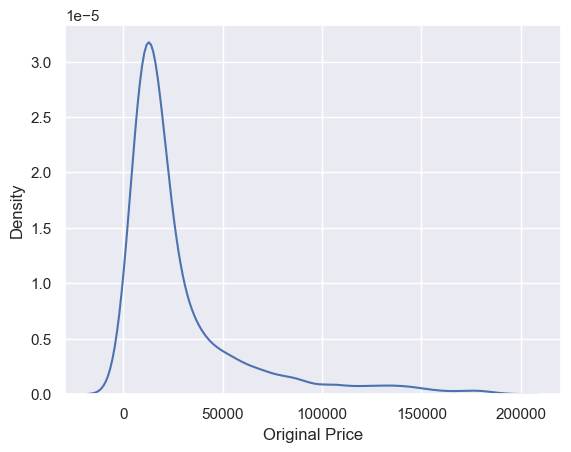

In [15]:
sb.kdeplot(data=data["Original Price"])

Number of outliers in Original Selling Price: 345


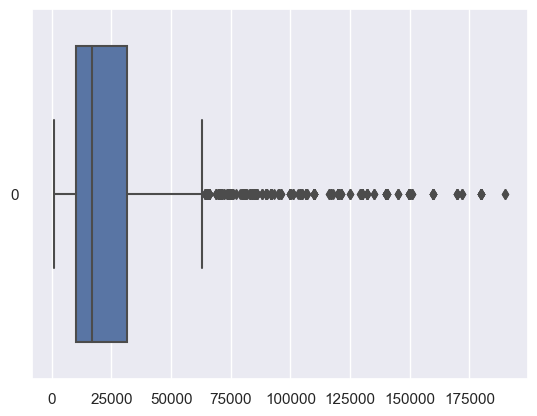

In [16]:
sb.boxplot(data=data['Original Price'], orient="h")

#Calculate outliers
Q1 = data['Original Price'].quantile(0.25)
Q3 = data['Original Price'].quantile(0.75)

IQR = Q3-Q1

lowerBound = Q1-(1.5*IQR)
upperBound = Q3+(1.5*IQR)

#identify all outliers

outliers = data[(data['Original Price'] < lowerBound) | (data['Original Price']> upperBound)]

print("Number of outliers in Original Selling Price: {}".format(len(outliers)))


<Axes: >

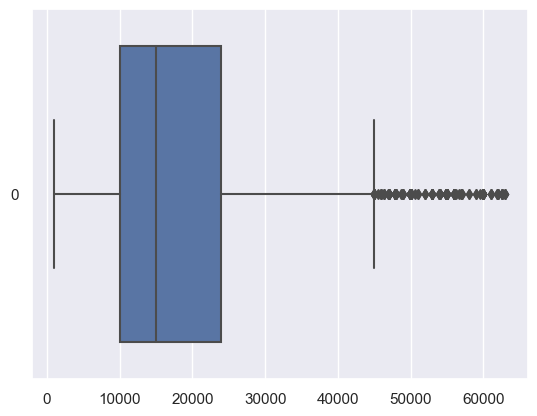

In [17]:
#Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    
    lowerBound = Q1-(1.5*IQR)
    upperBound = Q3+(1.5*IQR)
    
    df_filtered = df.loc[(df[column] >= lowerBound) & (df[column] <= upperBound)]
    
    return df_filtered


# Remove outliers in the original selling price
filtered_data = remove_outliers(data, "Original Price")
#df[df['Brands'].str.contains("Apple")].head(400)
sb.boxplot(data=filtered_data["Original Price"], orient="h")


In [18]:
#Count the number of null values in the data
filtered_data.isna().sum()

Brands                  0
Models                  0
Colors                  0
Memory                 29
Storage                36
Camera                  0
Rating                 85
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
dtype: int64

In [19]:
#Remove all the null values in the data
filtered_data = filtered_data.dropna()

In [20]:
#After the removal of null values
filtered_data.shape

(2625, 12)

In [21]:
filtered_data['Storage'] = filtered_data['Storage'].str.replace("Expandable Upto", "")

In [22]:
#filtered_data["Memory"] = filtered_data['Memory'].str.replace('GB', " GB")
#filtered_data = filtered_data.reset_index()

#Convert to GB
def convert_to_gb(size_str):
    if "MB" in size_str:
        return float(size_str.replace("MB", "")) / 1000
    elif "TB" in size_str:
        return float(size_str.replace("TB", "")) * 1000
    elif "GB" in size_str:
        return float(size_str.replace("GB", ""))
    else:
        return None


filtered_data["Memory"] = filtered_data['Memory'].apply(convert_to_gb)
filtered_data['Storage'] = filtered_data['Storage'].apply(convert_to_gb)
filtered_data.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8.000,128.000,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2.000,16.000,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4.000,64.000,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4.000,64.000,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,0.008,0.016,Yes,4.0,2199,2199,GIONEE L800,0,0.000000


Rating            0.417703
Memory            0.467205
Storage           0.540914
Original Price    1.000000
Name: Original Price, dtype: float64


<Axes: >

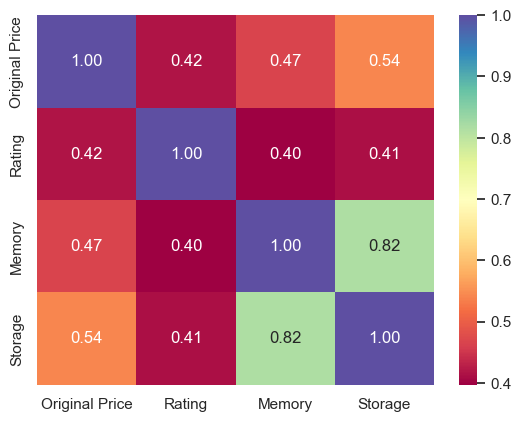

In [23]:
numeric_data = pd.DataFrame(filtered_data[["Original Price","Rating", "Memory", "Storage"]])
corr = numeric_data.corr()
print(corr['Original Price'].sort_values())
sb.heatmap(corr, annot=True, cmap="Spectral", fmt='.2f')


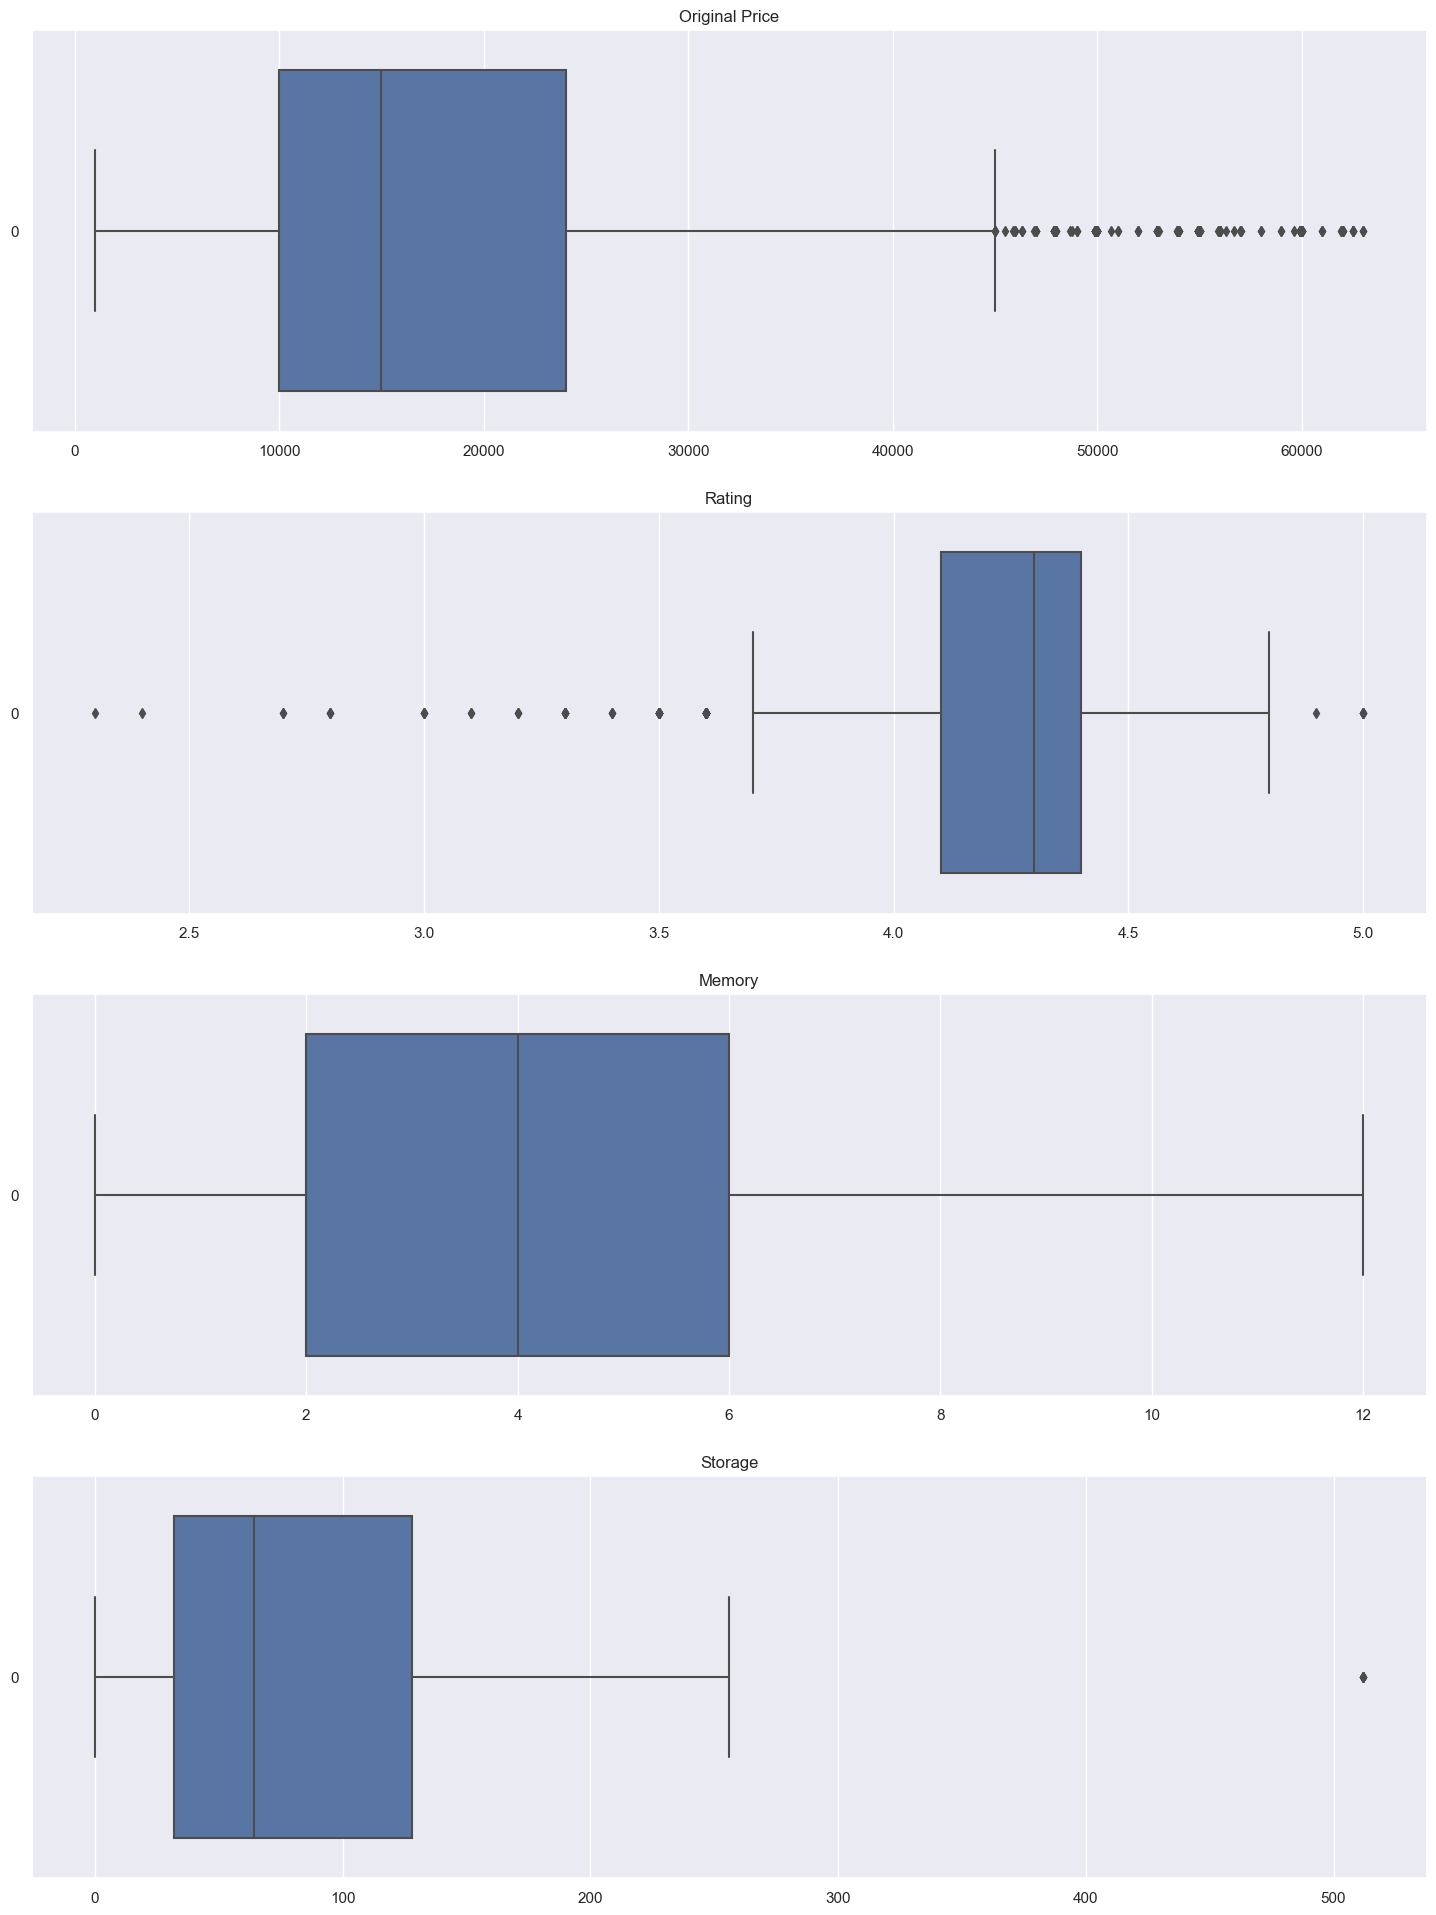

In [24]:
var = ["Original Price", "Rating", "Memory", "Storage"]
count = 0

f, axes = plt.subplots(4,figsize=(18,24))
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient="h", ax = axes[count]).set_title(var)
    count+=1

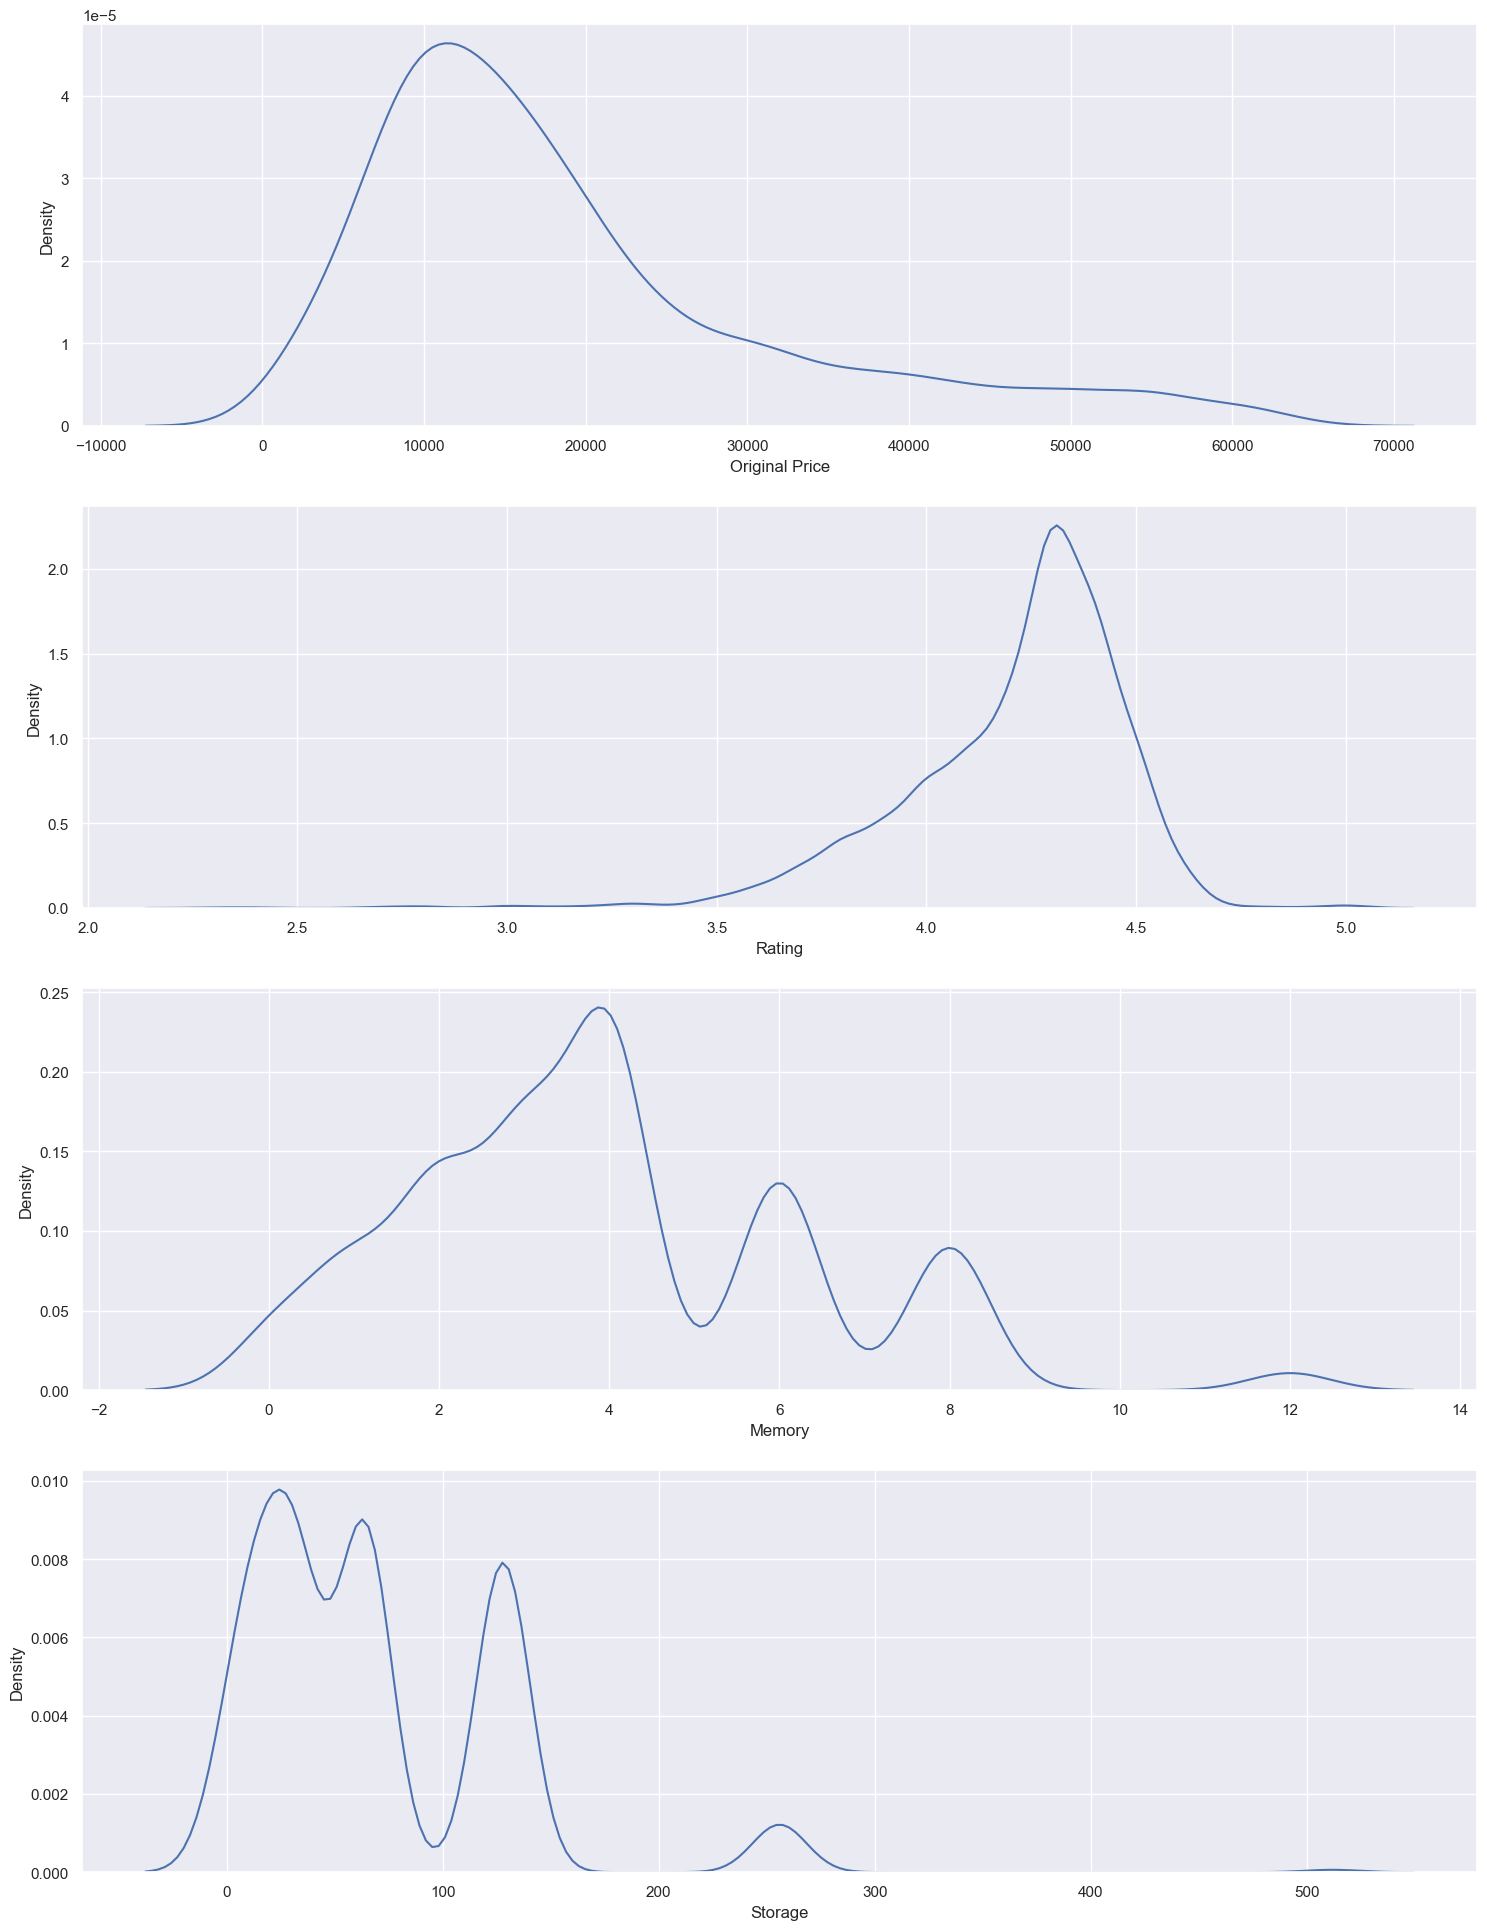

In [25]:
f, axes = plt.subplots(4,figsize=(18,24))
count = 0
for var in numeric_data:
    sb.kdeplot(data=filtered_data[var], ax = axes[count])
    count+=1

Coefficients of Regression: 120.13976047745105
Intercept of Regression: 10750.298859235954


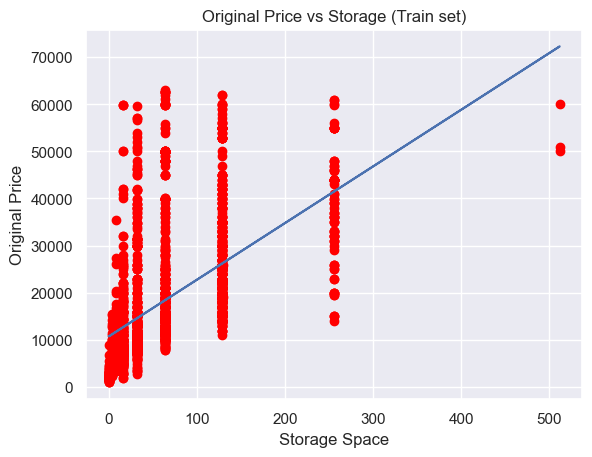

In [26]:
#Linear  Regression
storage = filtered_data[['Storage']] #Predictor
originalPrice = filtered_data['Original Price'] #Response

#Split the dataset into training and test set (80:20)
storage_train, storage_test, originalPrice_train, originalPrice_test = train_test_split(storage, originalPrice, test_size = 0.2)


#Fit linear regression into the training set
linreg = LinearRegression()
linreg.fit(storage_train, originalPrice_train)
print("Coefficients of Regression: {}".format(linreg.coef_[0])) 
print("Intercept of Regression: {}".format(linreg.intercept_)) 

#Plot the regression line
plt.scatter(storage_train, originalPrice_train, color='red')
plt.plot(storage_train, linreg.predict(storage_train))
plt.title("Original Price vs Storage (Train set)")
plt.xlabel('Storage Space')
plt.ylabel('Original Price')
plt.show()

Goodness of Fit of the Model Train Dataset
Explained Variance (R^2): 0.2951926799264406
Mean Squared Error (MSE): 122184482.63615455

Goodness of Fit of the Model Test Dataset
Explained Variance (R^2): 0.2820841243071127
Mean Squared Error (MSE): 132102129.6677909


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

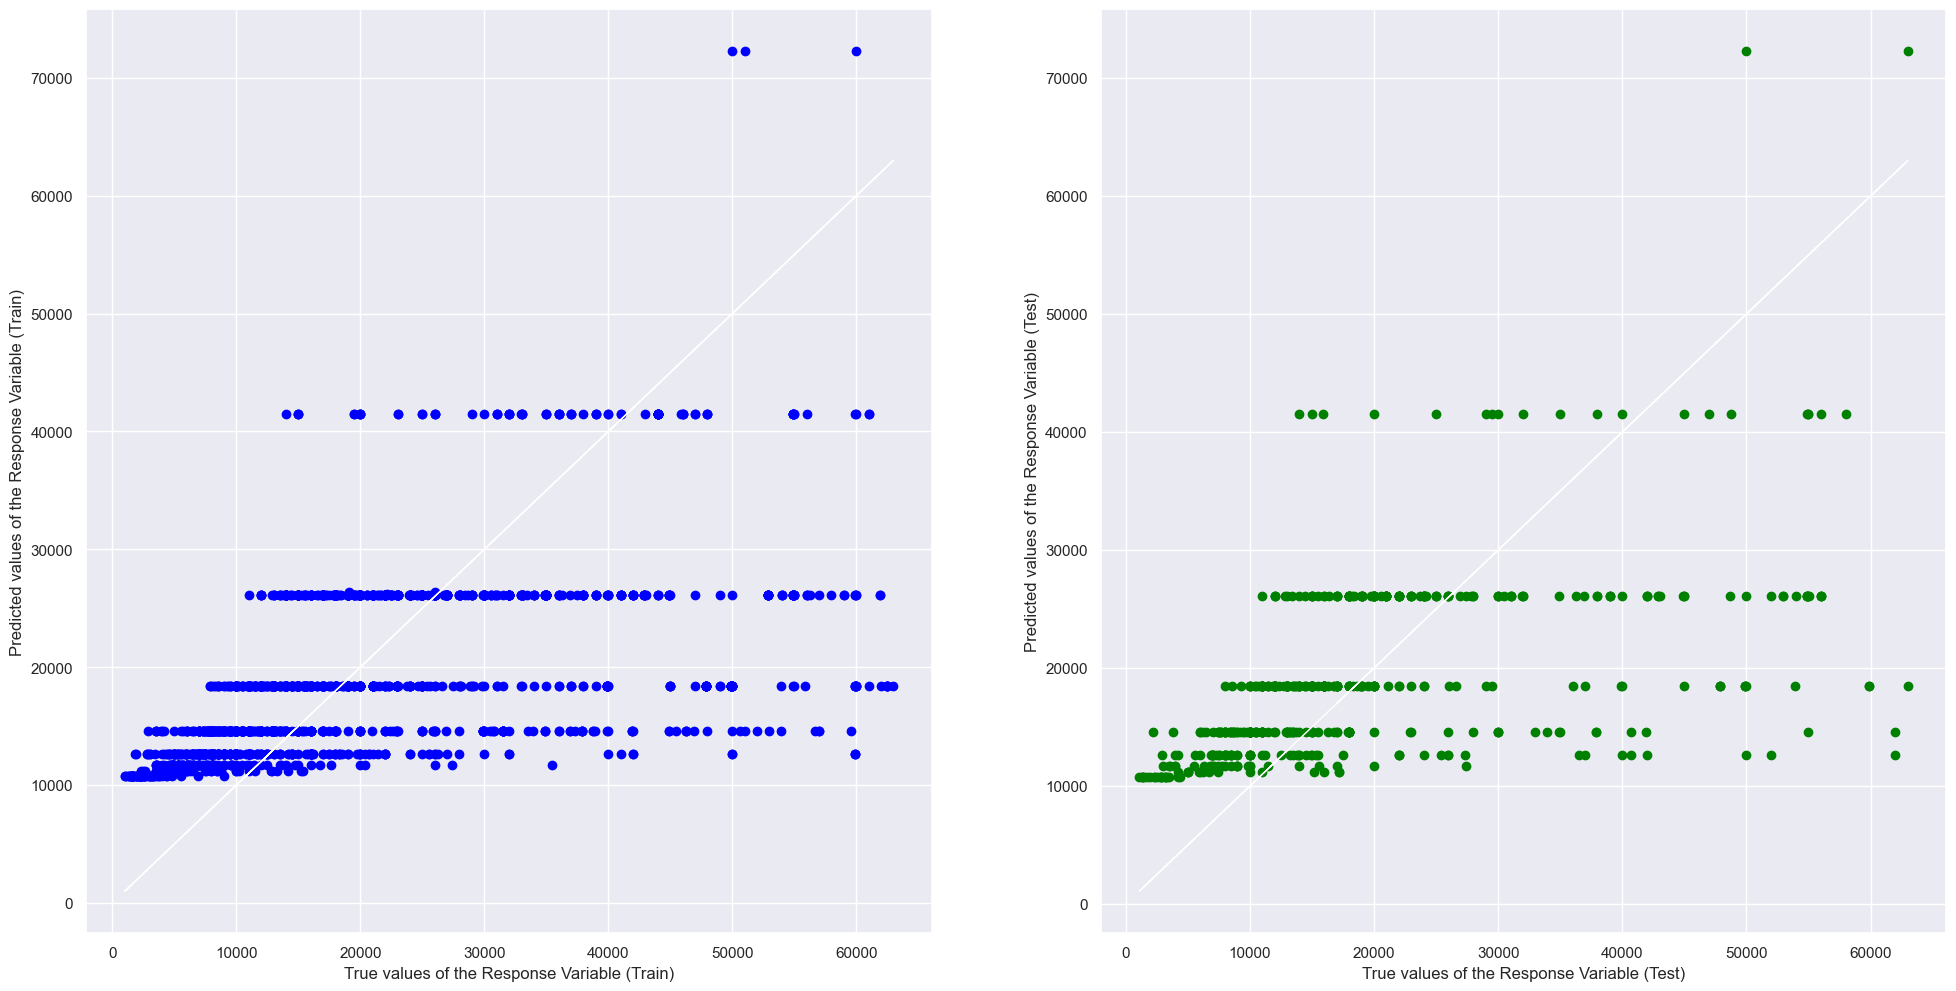

In [27]:
#Goodness of Fit of the model for the train set
originalPrice_test_pred = linreg.predict(storage_test)
originalPrice_train_pred = linreg.predict(storage_train)


#Goodness of Fit (on Train data)
print("Goodness of Fit of the Model Train Dataset")
print("Explained Variance (R^2): {}".format(linreg.score(storage_train, originalPrice_train)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(originalPrice_train, originalPrice_train_pred)))
print()

#Goodness of Fit (on Test Data)
print("Goodness of Fit of the Model Test Dataset")
print("Explained Variance (R^2): {}".format(linreg.score(storage_test, originalPrice_test)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(originalPrice_test, originalPrice_test_pred)))


#Plot the predictions vs the true values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(originalPrice_train, originalPrice_train_pred, color='blue')
axes[0].plot(originalPrice_train, originalPrice_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")


axes[1].scatter(originalPrice_test, originalPrice_test_pred, color='green')
axes[1].plot(originalPrice_test, originalPrice_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Coefficients of Regression: 2699.26574849507
Intercept of Regression: 8731.506802958591


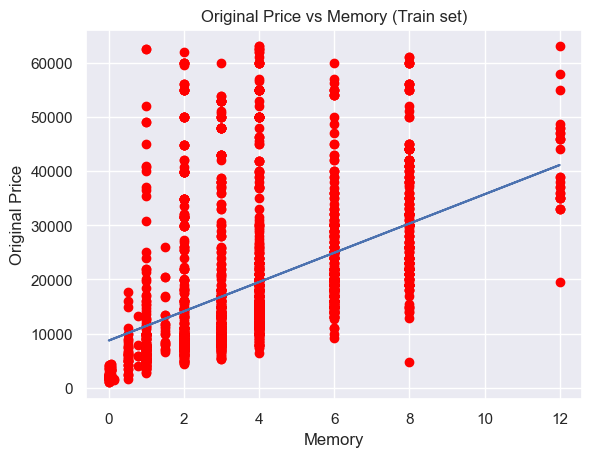

In [28]:
#Linear  Regression
memory = filtered_data[['Memory']] #Predictor
originalPrice = filtered_data['Original Price'] #Response

#Split the dataset into training and test set (80:20)
memory_train, memory_test, originalPrice_train, originalPrice_test = train_test_split(memory, originalPrice, test_size = 0.2)


#Fit linear regression into the training set
linreg = LinearRegression()
linreg.fit(memory_train, originalPrice_train)
print("Coefficients of Regression: {}".format(linreg.coef_[0])) 
print("Intercept of Regression: {}".format(linreg.intercept_)) 

#Plot the regression line
plt.scatter(memory_train, originalPrice_train, color='red')
plt.plot(memory_train, linreg.predict(memory_train))
plt.title("Original Price vs Memory (Train set)")
plt.xlabel('Memory')
plt.ylabel('Original Price')
plt.show()

Goodness of Fit of the Model Train Dataset
Explained Variance (R^2): 0.21916560691826292
Mean Squared Error (MSE): 140021733.068829

Goodness of Fit of the Model Test Dataset
Explained Variance (R^2): 0.20776077631710854
Mean Squared Error (MSE): 126265522.68501018


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

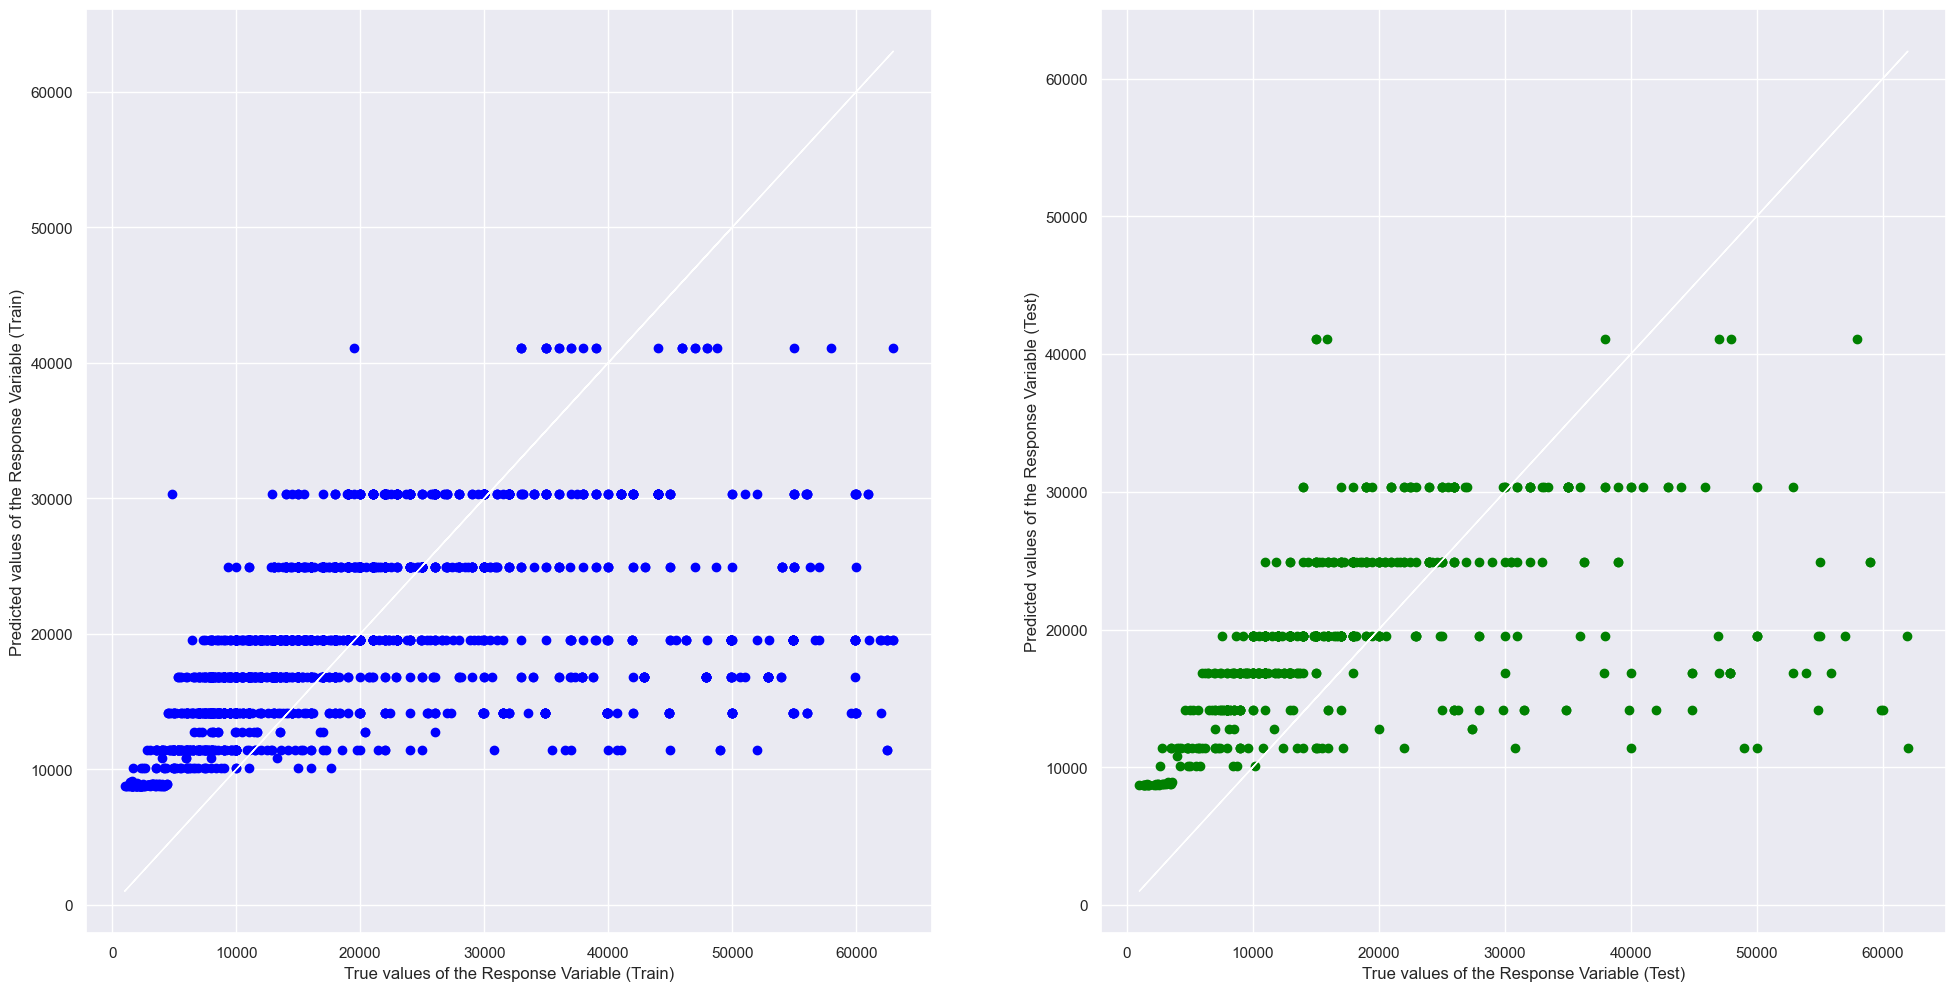

In [29]:
#Goodness of Fit of the model for the train set
originalPrice_test_pred = linreg.predict(memory_test)
originalPrice_train_pred = linreg.predict(memory_train)


#Goodness of Fit (on Train data)
print("Goodness of Fit of the Model Train Dataset")
print("Explained Variance (R^2): {}".format(linreg.score(memory_train, originalPrice_train)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(originalPrice_train, originalPrice_train_pred)))
print()

#Goodness of Fit (on Test Data)
print("Goodness of Fit of the Model Test Dataset")
print("Explained Variance (R^2): {}".format(linreg.score(memory_test, originalPrice_test)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(originalPrice_test, originalPrice_test_pred)))


#Plot the predictions vs the true values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(originalPrice_train, originalPrice_train_pred, color='blue')
axes[0].plot(originalPrice_train, originalPrice_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")


axes[1].scatter(originalPrice_test, originalPrice_test_pred, color='green')
axes[1].plot(originalPrice_test, originalPrice_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Coefficients of Regression: 21316.336729770384
Intercept of Regression: -70414.1762887877


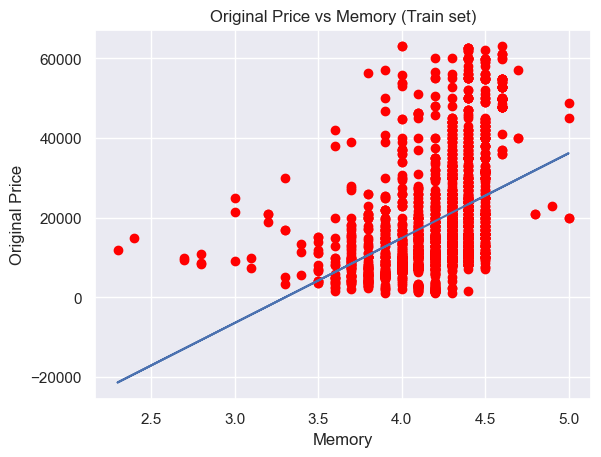

In [30]:
#Linear  Regression
rating = filtered_data[['Rating']] #Predictor
originalPrice = filtered_data['Original Price'] #Response

#Split the dataset into training and test set (80:20)
rating_train, rating_test, originalPrice_train, originalPrice_test = train_test_split(rating, originalPrice, test_size = 0.2)


#Fit linear regression into the training set
linreg = LinearRegression()
linreg.fit(rating_train, originalPrice_train)
print("Coefficients of Regression: {}".format(linreg.coef_[0])) 
print("Intercept of Regression: {}".format(linreg.intercept_)) 

#Plot the regression line
plt.scatter(rating_train, originalPrice_train, color='red')
plt.plot(rating_train, linreg.predict(rating_train))
plt.title("Original Price vs Memory (Train set)")
plt.xlabel('Memory')
plt.ylabel('Original Price')
plt.show()

Goodness of Fit of the Model Train Dataset
Explained Variance (R^2): 0.1750510774927072
Mean Squared Error (MSE): 149694727.09233654

Goodness of Fit of the Model Test Dataset
Explained Variance (R^2): 0.16379784010509513
Mean Squared Error (MSE): 125921816.07959996


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

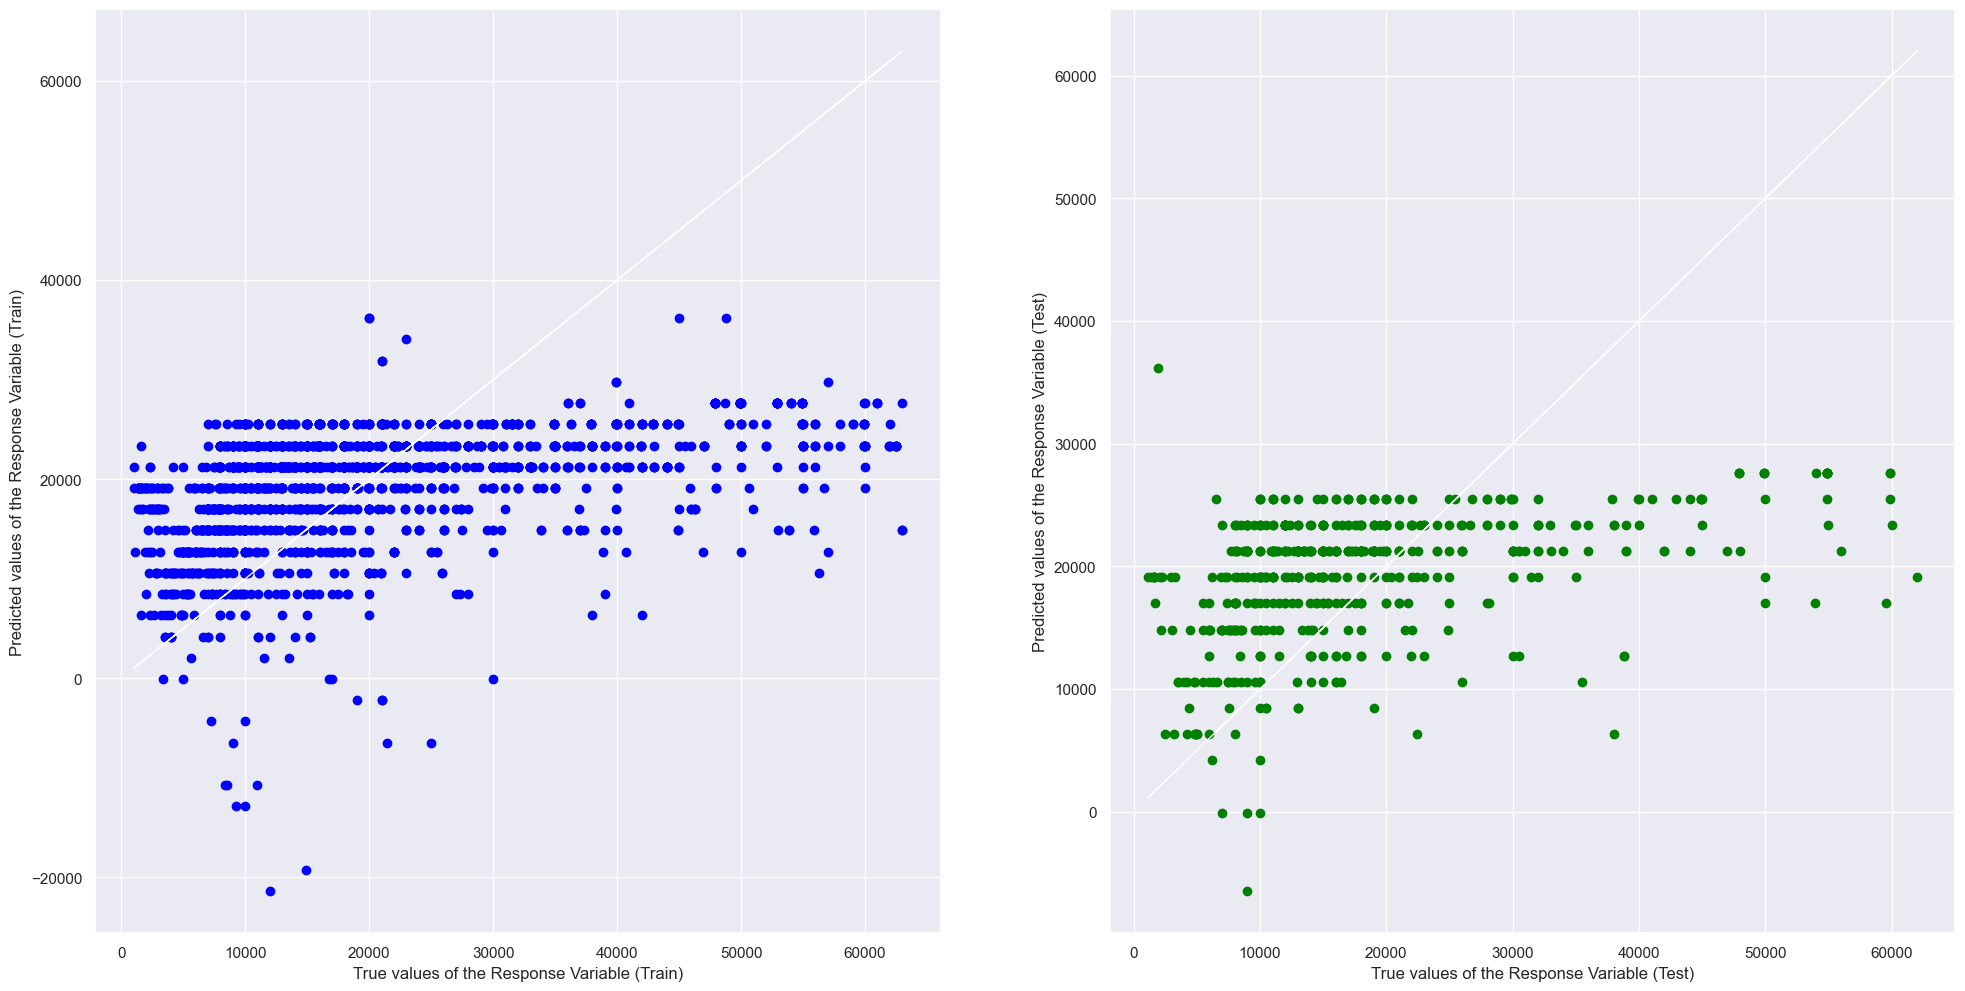

In [31]:
#Goodness of Fit of the model for the train set
originalPrice_test_pred = linreg.predict(rating_test)
originalPrice_train_pred = linreg.predict(rating_train)


#Goodness of Fit (on Train data)
print("Goodness of Fit of the Model Train Dataset")
print("Explained Variance (R^2): {}".format(linreg.score(rating_train, originalPrice_train)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(originalPrice_train, originalPrice_train_pred)))
print()

#Goodness of Fit (on Test Data)
print("Goodness of Fit of the Model Test Dataset")
print("Explained Variance (R^2): {}".format(linreg.score(rating_test, originalPrice_test)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(originalPrice_test, originalPrice_test_pred)))


#Plot the predictions vs the true values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(originalPrice_train, originalPrice_train_pred, color='blue')
axes[0].plot(originalPrice_train, originalPrice_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")


axes[1].scatter(originalPrice_test, originalPrice_test_pred, color='green')
axes[1].plot(originalPrice_test, originalPrice_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

<Axes: xlabel='Original Price', ylabel='Brands'>

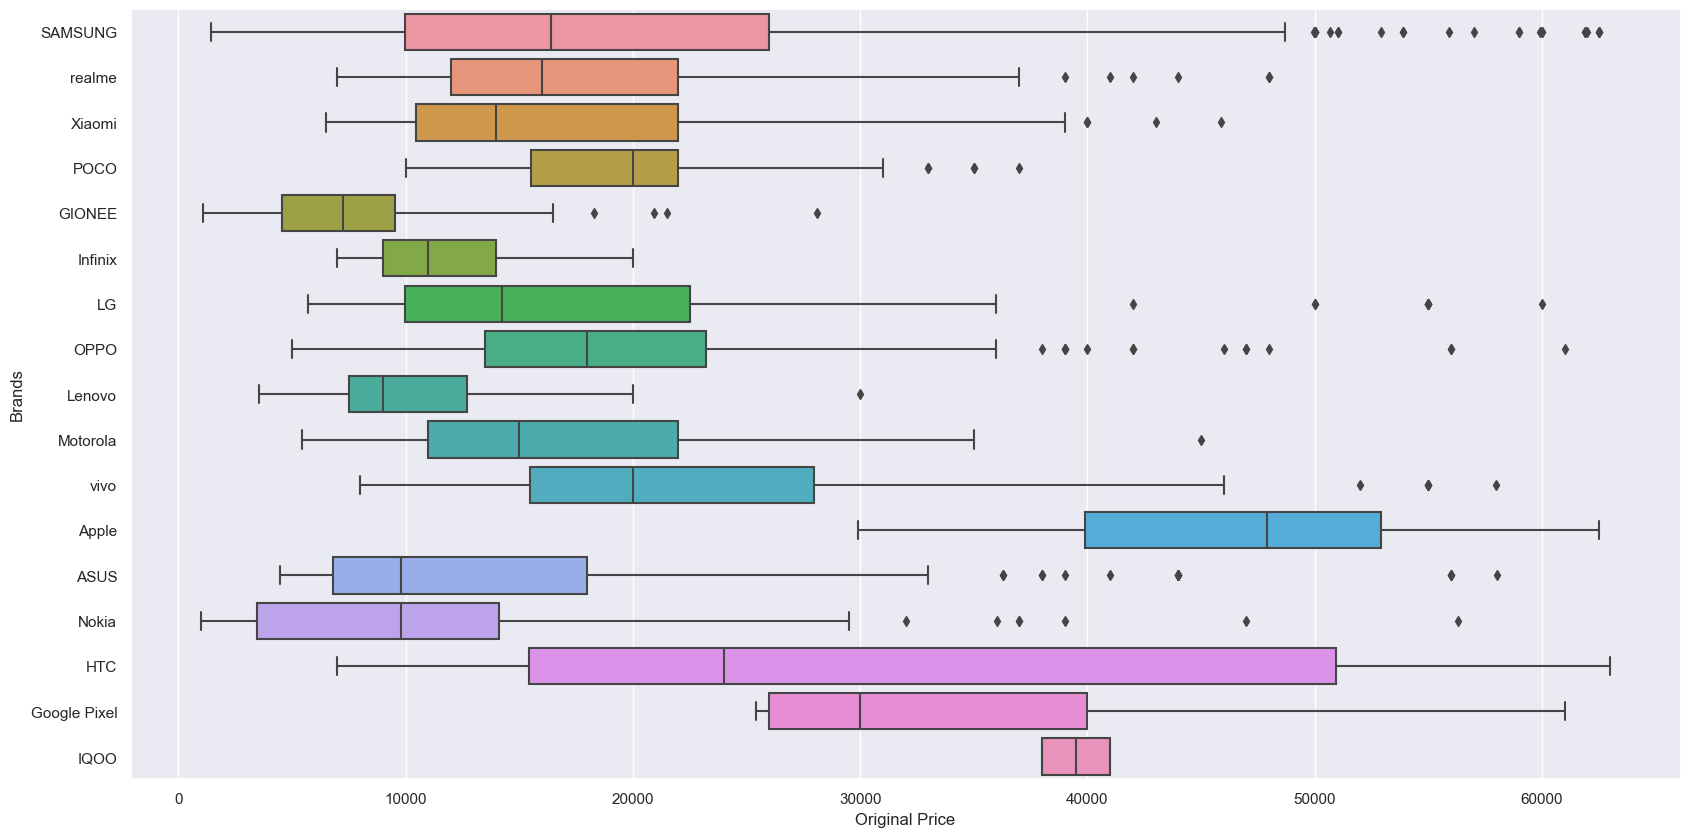

In [32]:
originalPrice = pd.DataFrame(filtered_data['Original Price'])
brands = pd.DataFrame(filtered_data['Brands'])

originalPrice_train, originalPrice_test, brands_train, brands_test = train_test_split(originalPrice, brands, test_size = 0.2)

joint = pd.concat([originalPrice_train, brands_train], axis=1).reindex(originalPrice_train.index)

f = plt.figure(figsize=(20,10))
sb.boxplot(x="Original Price", y="Brands", data = joint, orient="h")

<Axes: xlabel='Original Price', ylabel='Brands'>

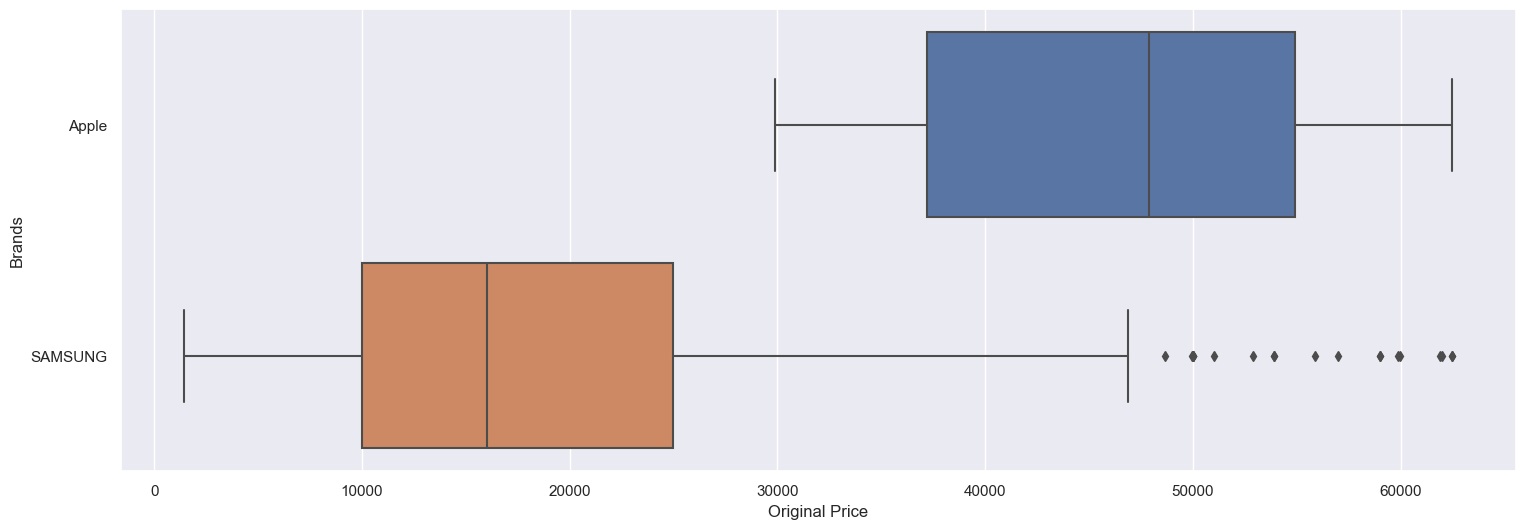

In [33]:
df = pd.DataFrame(filtered_data) 

df_filtered = df[(df['Brands'] == 'Apple') | (df['Brands'] == 'SAMSUNG')]

originalPrice = df_filtered[['Original Price']] #Predictor
brands = df_filtered['Brands'] #Response

originalPrice_train, originalPrice_test, brands_train, brands_test = train_test_split(originalPrice, brands, test_size = 0.2)

joint = pd.concat([originalPrice_train, brands_train], axis = 1).reindex(originalPrice_train.index)
f = plt.figure(figsize=(18,6))
sb.boxplot(x='Original Price', y ='Brands', data = joint, orient="h")

C:\Users\fonga\AppData\Local\Temp\ipykernel_12960\656596939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Brands'] = label_encoder.fit_transform(df_filtered['Brands'])


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9029605263157895
True postive rate 		: 0.9598393574297188
False positive rate 		: 0.35454545454545455

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8627450980392157
True postive rate 		: 0.9122807017543859
False positive rate 		: 0.28205128205128205



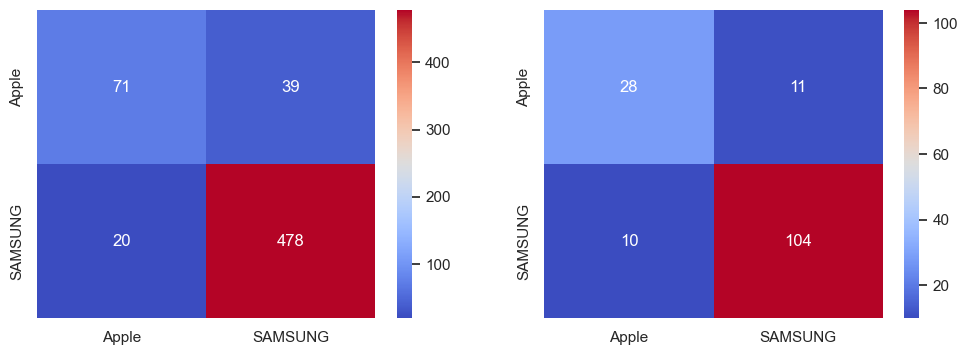

In [34]:
label_encoder = LabelEncoder()
df_filtered['Brands'] = label_encoder.fit_transform(df_filtered['Brands'])

##Depth 3
dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(originalPrice_train, brands_train)

#Predict the smartphone brand
brand_train_pred = dectree.predict(originalPrice_train)
brand_test_pred = dectree.predict(originalPrice_test)

cm_train = confusion_matrix(brands_train, brand_train_pred)
cm_test = confusion_matrix(brands_test, brand_test_pred)

tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(cm_train, annot=True, fmt="d", cmap="coolwarm", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax = axes[0])
sb.heatmap(cm_test, annot=True, fmt="d", cmap="coolwarm", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax = axes[1])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(originalPrice_train, brands_train))
print("True postive rate \t\t:", (tp_train/(tp_train+fn_train)))
print("False positive rate \t\t:", (fp_train/(tn_train+fp_train)))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(originalPrice_test, brands_test))
print("True postive rate \t\t:", (tp_test/(tp_test+fn_test)))
print("False positive rate \t\t:", (fp_test/(tn_test+fp_test)))
print()

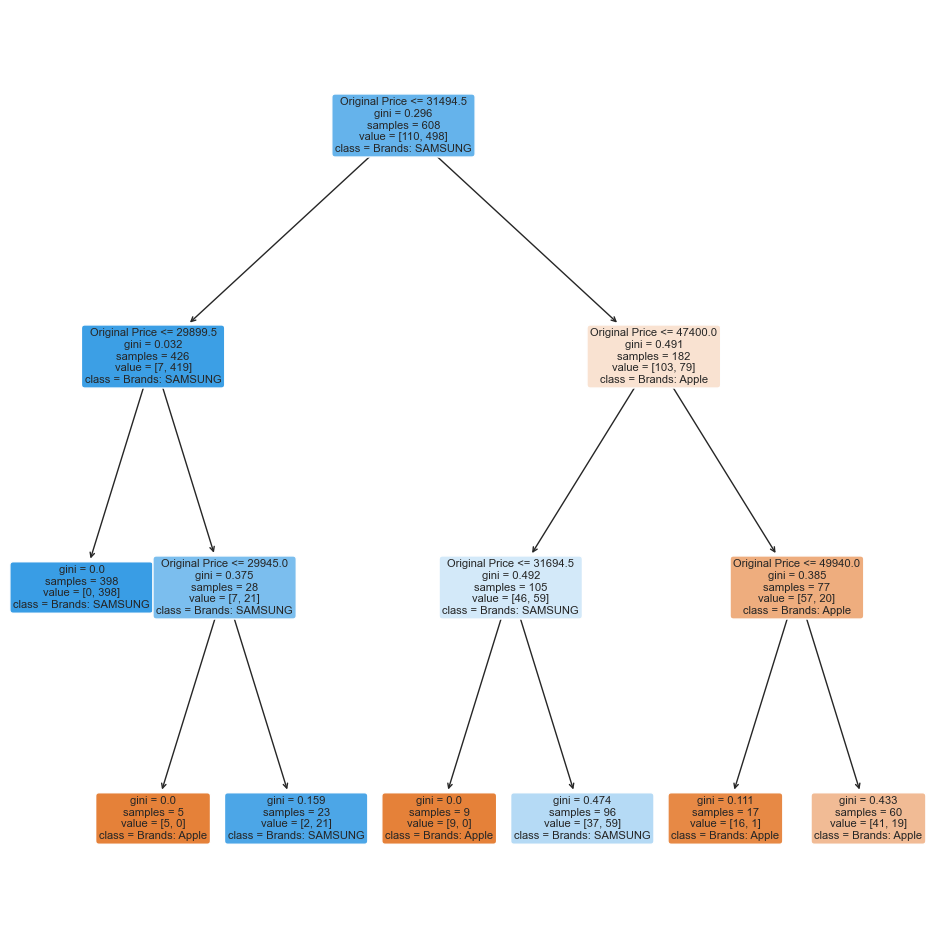

In [35]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Original Price"], 
          class_names=["Brands: Apple","Brands: SAMSUNG"])
plt.show()